<a href="https://colab.research.google.com/github/degru82/datasci_2020/blob/master/mass_transit_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업순서
1.  승
1.  데이터의 요모조모 살펴보기
1.  데이터셋 만들기
1.   

In [1]:
import pandas as pd

# 승하차 기록을 데이터셋으로 구축

## 구글 드라이브에 올린 파일 읽어오기

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/15QVZaX8wGTVFvk19875HS5rHDcR-IcVL/view?usp=sharing'

In [4]:
id = link.split('/')[5]
print(id)

15QVZaX8wGTVFvk19875HS5rHDcR-IcVL


In [5]:
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
df = pd.read_excel('서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).xlsx', skiprows=1)

In [6]:
df.head()

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,1401,2166,2844,3055,2341,3370,3226,3447,3277,2898,2590,3004,2234,970,38,39559
1,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,1737,1917,2316,2539,2360,2743,2491,2572,2060,1991,1683,1217,764,456,149,31279
2,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,395,500,672,673,868,946,958,1062,1146,1119,992,904,570,211,6,11836
3,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,648,744,960,996,875,964,733,746,606,374,311,268,177,144,57,10359
4,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,365,666,802,1103,1294,1843,1870,2129,2024,1806,1796,1780,1296,497,31,21042


In [7]:
df.info

<bound method DataFrame.info of                날짜   호선   역번호   역명  구분  ...  21 ~ 22  22 ~ 23  23 ~ 24  24시 이후    합 계
0      2019-01-01  1호선   150  서울역  승차  ...     3004     2234      970      38  39559
1      2019-01-01  1호선   150  서울역  하차  ...     1217      764      456     149  31279
2      2019-01-01  1호선   151   시청  승차  ...      904      570      211       6  11836
3      2019-01-01  1호선   151   시청  하차  ...      268      177      144      57  10359
4      2019-01-01  1호선   152   종각  승차  ...     1780     1296      497      31  21042
...           ...  ...   ...  ...  ..  ...      ...      ...      ...     ...    ...
200799 2019-12-31  8호선  2825   신흥  하차  ...      301      257      154     163   5794
200800 2019-12-31  8호선  2826   수진  승차  ...      155      126       68      82   6228
200801 2019-12-31  8호선  2826   수진  하차  ...      332      322      256     163   5996
200802 2019-12-31  8호선  2827   모란  승차  ...      152      189      126      65   5151
200803 2019-12-31  8호선  2827   모란

In [8]:
len(df['날짜'].unique())

365

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200804 entries, 0 to 200803
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   날짜       200804 non-null  datetime64[ns]
 1   호선       200804 non-null  object        
 2   역번호      200804 non-null  int64         
 3   역명       200804 non-null  object        
 4   구분       200804 non-null  object        
 5   06시 이전   200804 non-null  int64         
 6   06 ~ 07  200804 non-null  int64         
 7   07 ~ 08  200804 non-null  int64         
 8   08 ~ 09  200804 non-null  int64         
 9   09 ~ 10  200804 non-null  int64         
 10  10 ~ 11  200804 non-null  int64         
 11  11 ~ 12  200804 non-null  int64         
 12  12 ~ 13  200804 non-null  int64         
 13  13 ~ 14  200804 non-null  int64         
 14  14 ~ 15  200804 non-null  int64         
 15  15 ~ 16  200804 non-null  int64         
 16  16 ~ 17  200804 non-null  int64         
 17  17 ~ 18  2

In [10]:
df.isnull().sum()

날짜         0
호선         0
역번호        0
역명         0
구분         0
06시 이전     0
06 ~ 07    0
07 ~ 08    0
08 ~ 09    0
09 ~ 10    0
10 ~ 11    0
11 ~ 12    0
12 ~ 13    0
13 ~ 14    0
14 ~ 15    0
15 ~ 16    0
16 ~ 17    0
17 ~ 18    0
18 ~ 19    0
19 ~ 20    0
20 ~ 21    0
21 ~ 22    0
22 ~ 23    0
23 ~ 24    0
24시 이후     0
합 계        0
dtype: int64

In [11]:
df.describe()

,역번호,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
count,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000,200804.000000
mean,1631.197675,143.016205,382.201017,968.724468,1730.389300,1140.177855,788.732147,771.991051,822.334077,890.633145,877.779023,937.735693,1051.389923,1283.462710,1777.629270,1232.679872,835.964687,785.288799,702.208412,393.802374,108.168423,17624.308450
std,1175.266476,207.252291,386.666379,1217.612828,2381.617545,1457.576971,763.657369,728.069695,763.069726,847.095146,832.129660,890.752418,988.929706,1276.507358,2106.766567,1391.038662,951.063599,951.563892,904.494167,504.386112,175.684336,15598.305429
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,317.000000,35.000000,138.000000,236.000000,418.000000,386.000000,322.000000,318.000000,354.000000,379.000000,372.000000,398.000000,454.000000,522.000000,589.000000,394.000000,281.000000,256.000000,214.000000,111.000000,12.000000,7633.000000
50%,2529.000000,74.000000,259.000000,508.000000,967.000000,705.000000,569.000000,560.000000,605.000000,647.000000,628.000000,670.000000,767.000000,908.000000,1117.000000,785.000000,541.000000,498.000000,445.000000,248.000000,51.000000,13032.000000
75%,2648.000000,171.000000,475.000000,1212.000000,1988.000000,1305.000000,940.000000,942.000000,1002.000000,1077.000000,1065.000000,1137.000000,1276.000000,1516.000000,2029.000000,1519.000000,995.000000,909.000000,824.000000,480.000000,139.000000,21963.000000
max,2827.000000,6023.000000,3954.000000,11560.000000,20891.000000,19241.000000,8417.000000,14667.000000,25062.000000,22378.000000,15701.000000,13544.000000,15123.000000,18887.000000,20397.000000,20220.000000,18840.000000,24300.000000,22970.000000,13166.000000,9664.000000,140017.000000


## 데이터 프레임으로 가공

In [12]:
dfcopy = df.drop(['합 계'], axis=1)
dfcopy

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후
0,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,1401,2166,2844,3055,2341,3370,3226,3447,3277,2898,2590,3004,2234,970,38
1,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,1737,1917,2316,2539,2360,2743,2491,2572,2060,1991,1683,1217,764,456,149
2,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,395,500,672,673,868,946,958,1062,1146,1119,992,904,570,211,6
3,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,648,744,960,996,875,964,733,746,606,374,311,268,177,144,57
4,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,365,666,802,1103,1294,1843,1870,2129,2024,1806,1796,1780,1296,497,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200799,2019-12-31,8호선,2825,신흥,하차,20,87,86,243,208,189,205,327,347,381,382,501,510,562,493,378,301,257,154,163
200800,2019-12-31,8호선,2826,수진,승차,111,224,542,813,436,343,267,350,297,285,407,427,436,395,245,219,155,126,68,82
200801,2019-12-31,8호선,2826,수진,하차,27,97,115,433,259,198,207,283,381,376,404,373,463,501,452,354,332,322,256,163
200802,2019-12-31,8호선,2827,모란,승차,73,95,342,482,253,210,253,281,377,350,303,366,375,418,242,199,152,189,126,65


In [13]:
# 원본인 df에 drop을 실행해도 원본에는 반영되지 않습니다

df

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,1401,2166,2844,3055,2341,3370,3226,3447,3277,2898,2590,3004,2234,970,38,39559
1,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,1737,1917,2316,2539,2360,2743,2491,2572,2060,1991,1683,1217,764,456,149,31279
2,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,395,500,672,673,868,946,958,1062,1146,1119,992,904,570,211,6,11836
3,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,648,744,960,996,875,964,733,746,606,374,311,268,177,144,57,10359
4,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,365,666,802,1103,1294,1843,1870,2129,2024,1806,1796,1780,1296,497,31,21042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200799,2019-12-31,8호선,2825,신흥,하차,20,87,86,243,208,189,205,327,347,381,382,501,510,562,493,378,301,257,154,163,5794
200800,2019-12-31,8호선,2826,수진,승차,111,224,542,813,436,343,267,350,297,285,407,427,436,395,245,219,155,126,68,82,6228
200801,2019-12-31,8호선,2826,수진,하차,27,97,115,433,259,198,207,283,381,376,404,373,463,501,452,354,332,322,256,163,5996
200802,2019-12-31,8호선,2827,모란,승차,73,95,342,482,253,210,253,281,377,350,303,366,375,418,242,199,152,189,126,65,5151


In [14]:
dfcopy['날짜'] = pd.to_datetime(dfcopy['날짜'])
dfcopy['요일'] = dfcopy['날짜'].dt.dayofweek

In [15]:
dfcopy.head()

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,요일
0,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,1401,2166,2844,3055,2341,3370,3226,3447,3277,2898,2590,3004,2234,970,38,1
1,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,1737,1917,2316,2539,2360,2743,2491,2572,2060,1991,1683,1217,764,456,149,1
2,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,395,500,672,673,868,946,958,1062,1146,1119,992,904,570,211,6,1
3,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,648,744,960,996,875,964,733,746,606,374,311,268,177,144,57,1
4,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,365,666,802,1103,1294,1843,1870,2129,2024,1806,1796,1780,1296,497,31,1


In [16]:
dfcopy['월'] = dfcopy['날짜'].dt.month

In [17]:
dfcopy.tail()

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,요일,월
200799,2019-12-31,8호선,2825,신흥,하차,20,87,86,243,208,189,205,327,347,381,382,501,510,562,493,378,301,257,154,163,1,12
200800,2019-12-31,8호선,2826,수진,승차,111,224,542,813,436,343,267,350,297,285,407,427,436,395,245,219,155,126,68,82,1,12
200801,2019-12-31,8호선,2826,수진,하차,27,97,115,433,259,198,207,283,381,376,404,373,463,501,452,354,332,322,256,163,1,12
200802,2019-12-31,8호선,2827,모란,승차,73,95,342,482,253,210,253,281,377,350,303,366,375,418,242,199,152,189,126,65,1,12
200803,2019-12-31,8호선,2827,모란,하차,15,99,140,386,189,175,215,142,224,220,235,306,277,403,279,213,195,186,130,407,1,12


In [18]:
id_variables = list(dfcopy.columns[:5]) + list(dfcopy.columns[-2:])

id_variables

['날짜', '호선', '역번호', '역명', '구분', '요일', '월']

In [19]:
value_variables = list(dfcopy.columns[5:-2])
value_variables

['06시 이전',
 '06 ~ 07',
 '07 ~ 08',
 '08 ~ 09',
 '09 ~ 10',
 '10 ~ 11',
 '11 ~ 12',
 '12 ~ 13',
 '13 ~ 14',
 '14 ~ 15',
 '15 ~ 16',
 '16 ~ 17',
 '17 ~ 18',
 '18 ~ 19',
 '19 ~ 20',
 '20 ~ 21',
 '21 ~ 22',
 '22 ~ 23',
 '23 ~ 24',
 '24시 이후']

In [20]:
dfcopy_melt = pd.melt(dfcopy, id_vars=id_variables, 
                      value_vars=value_variables,
                      var_name='시간대',
                      value_name='인원수'
                      )
dfcopy_melt

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1호선,150,서울역,승차,1,1,06시 이전,348
1,2019-01-01,1호선,150,서울역,하차,1,1,06시 이전,222
2,2019-01-01,1호선,151,시청,승차,1,1,06시 이전,87
3,2019-01-01,1호선,151,시청,하차,1,1,06시 이전,48
4,2019-01-01,1호선,152,종각,승차,1,1,06시 이전,669
...,...,...,...,...,...,...,...,...,...
4016075,2019-12-31,8호선,2825,신흥,하차,1,12,24시 이후,163
4016076,2019-12-31,8호선,2826,수진,승차,1,12,24시 이후,82
4016077,2019-12-31,8호선,2826,수진,하차,1,12,24시 이후,163
4016078,2019-12-31,8호선,2827,모란,승차,1,12,24시 이후,65


In [21]:
dfcopy_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016080 entries, 0 to 4016079
Data columns (total 9 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   호선      object        
 2   역번호     int64         
 3   역명      object        
 4   구분      object        
 5   요일      int64         
 6   월       int64         
 7   시간대     object        
 8   인원수     int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 275.8+ MB


In [22]:
dfcopy_melt['호선'] = dfcopy_melt['호선'].map({
    '1호선': 1,
    '2호선': 2,
    '3호선': 3,
    '4호선': 4,
    '5호선': 5,
    '6호선': 6,
    '7호선': 7,
    '8호선': 8
})
dfcopy_melt

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1,150,서울역,승차,1,1,06시 이전,348
1,2019-01-01,1,150,서울역,하차,1,1,06시 이전,222
2,2019-01-01,1,151,시청,승차,1,1,06시 이전,87
3,2019-01-01,1,151,시청,하차,1,1,06시 이전,48
4,2019-01-01,1,152,종각,승차,1,1,06시 이전,669
...,...,...,...,...,...,...,...,...,...
4016075,2019-12-31,8,2825,신흥,하차,1,12,24시 이후,163
4016076,2019-12-31,8,2826,수진,승차,1,12,24시 이후,82
4016077,2019-12-31,8,2826,수진,하차,1,12,24시 이후,163
4016078,2019-12-31,8,2827,모란,승차,1,12,24시 이후,65


In [23]:
dfcopy_melt['구분'] = dfcopy_melt['구분'].map(
    {
        '승차':  1,
        '하차':  0
    }
)

dfcopy_melt

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1,150,서울역,1,1,1,06시 이전,348
1,2019-01-01,1,150,서울역,0,1,1,06시 이전,222
2,2019-01-01,1,151,시청,1,1,1,06시 이전,87
3,2019-01-01,1,151,시청,0,1,1,06시 이전,48
4,2019-01-01,1,152,종각,1,1,1,06시 이전,669
...,...,...,...,...,...,...,...,...,...
4016075,2019-12-31,8,2825,신흥,0,1,12,24시 이후,163
4016076,2019-12-31,8,2826,수진,1,1,12,24시 이후,82
4016077,2019-12-31,8,2826,수진,0,1,12,24시 이후,163
4016078,2019-12-31,8,2827,모란,1,1,12,24시 이후,65


In [24]:
dfcopy_melt['시간대'] = dfcopy_melt['시간대'].map({
    '06시 이전': 5,
    '06 ~ 07': 6,
    '07 ~ 08': 7,
    '08 ~ 09': 8,
    '09 ~ 10': 9,
    '10 ~ 11': 10,
    '11 ~ 12': 11,
    '12 ~ 13': 12,
    '13 ~ 14': 13,
    '14 ~ 15': 14,
    '15 ~ 16': 15,
    '16 ~ 17': 16,
    '17 ~ 18': 17,
    '18 ~ 19': 18,
    '19 ~ 20': 19,
    '20 ~ 21': 20,
    '21 ~ 22': 21,
    '22 ~ 23': 22,
    '23 ~ 24': 23,
    '24시 이후': 0
})

dfcopy_melt

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1,150,서울역,1,1,1,5,348
1,2019-01-01,1,150,서울역,0,1,1,5,222
2,2019-01-01,1,151,시청,1,1,1,5,87
3,2019-01-01,1,151,시청,0,1,1,5,48
4,2019-01-01,1,152,종각,1,1,1,5,669
...,...,...,...,...,...,...,...,...,...
4016075,2019-12-31,8,2825,신흥,0,1,12,0,163
4016076,2019-12-31,8,2826,수진,1,1,12,0,82
4016077,2019-12-31,8,2826,수진,0,1,12,0,163
4016078,2019-12-31,8,2827,모란,1,1,12,0,65


In [25]:
categorical_fields = [
    '호선',  '역번호',  '구분',  '요일',  '월',  '시간대'
]

for f in categorical_fields:
    dfcopy_melt[f] = dfcopy_melt[f].astype('category')

dfcopy_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016080 entries, 0 to 4016079
Data columns (total 9 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   호선      category      
 2   역번호     category      
 3   역명      object        
 4   구분      category      
 5   요일      category      
 6   월       category      
 7   시간대     category      
 8   인원수     int64         
dtypes: category(6), datetime64[ns](1), int64(1), object(1)
memory usage: 118.7+ MB


In [26]:
dfcopy_melt

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1,150,서울역,1,1,1,5,348
1,2019-01-01,1,150,서울역,0,1,1,5,222
2,2019-01-01,1,151,시청,1,1,1,5,87
3,2019-01-01,1,151,시청,0,1,1,5,48
4,2019-01-01,1,152,종각,1,1,1,5,669
...,...,...,...,...,...,...,...,...,...
4016075,2019-12-31,8,2825,신흥,0,1,12,0,163
4016076,2019-12-31,8,2826,수진,1,1,12,0,82
4016077,2019-12-31,8,2826,수진,0,1,12,0,163
4016078,2019-12-31,8,2827,모란,1,1,12,0,65


In [27]:
dfcopy_melt.columns

Index(['날짜', '호선', '역번호', '역명', '구분', '요일', '월', '시간대', '인원수'], dtype='object')

In [28]:
dfcopy_melt.head()

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
0,2019-01-01,1,150,서울역,1,1,1,5,348
1,2019-01-01,1,150,서울역,0,1,1,5,222
2,2019-01-01,1,151,시청,1,1,1,5,87
3,2019-01-01,1,151,시청,0,1,1,5,48
4,2019-01-01,1,152,종각,1,1,1,5,669


In [57]:
dfcopy_melt[(dfcopy_melt['날짜'] == '2019-01-01') & (dfcopy_melt['인원수'] == 6414)]

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
3413764,2019-01-01,2,239,홍대입구,1,1,1,22,6414


In [59]:
dfcopy_hongdae22 = dfcopy_melt[(dfcopy_melt['역번호'] == 239) & (dfcopy_melt['시간대'] == 22) & (dfcopy_melt['구분'] == 1)]

In [60]:
dfcopy_hongdae22

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수
3413764,2019-01-01,2,239,홍대입구,1,1,1,22,6414
3414314,2019-01-02,2,239,홍대입구,1,2,1,22,7582
3414864,2019-01-03,2,239,홍대입구,1,3,1,22,8027
3415414,2019-01-04,2,239,홍대입구,1,4,1,22,9029
3415964,2019-01-05,2,239,홍대입구,1,5,1,22,10900
...,...,...,...,...,...,...,...,...,...
3611810,2019-12-27,2,239,홍대입구,1,4,12,22,10440
3612362,2019-12-28,2,239,홍대입구,1,5,12,22,11505
3612914,2019-12-29,2,239,홍대입구,1,6,12,22,7973
3613464,2019-12-30,2,239,홍대입구,1,0,12,22,9724


# 날씨 기록을 데이터셋으로 구축

## Hands Dirty

In [ ]:
import requests

http://www.weather.go.kr/weather/climate/past_cal.jsp?stn=108&yy=2019&mm=1&obs=1&x=20&y=10

In [ ]:
base_url = 'http://www.weather.go.kr/weather/climate/past_cal.jsp?'
fields = {
    'stn': 108,
    'yy': 2019,
    'mm': 1,
    'obs': 1,
    'x': 20,
    'y': 10
}


In [ ]:
query_str_arr = []
for k, v in fields.items():
    query_str_arr.append(
        str(k) + '=' + str(v)
    )

query_str = '&'.join(query_str_arr)
query_str

In [ ]:
response = requests.get(base_url+query_str)

In [ ]:
response.text

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
soup

In [ ]:
table_tags = soup.find_all('table', class_='table_develop')
len(table_tags)

In [ ]:
tablebody = table_tags[0].tbody
tablebody

In [ ]:
table_rows = tablebody.find_all('tr')
len(table_rows)

In [ ]:
date_rows = table_rows[::2]
weather_rows = table_rows[1::2]

monthly_weather = {}

for tr_date, tr_wthr in zip(date_rows, weather_rows):
    for td_date, td_wthr in zip(tr_date, tr_wthr):
        weather_contents = str(td_wthr)[23:-5]
        weathers = weather_contents.split('<br/>')
        weathers = [w.strip('\n') for w in weathers]
        monthly_weather[td_date.string] = weathers

monthly_weather['15일'], monthly_weather['1일']

In [ ]:
import re


month_weather_data = {}

for m_day, w_data in monthly_weather.items():
    if '일' not in m_day:
        continue

    exact_dday = int(m_day[:-1])
    month_weather_data[exact_dday] = {}
    
    for wthr in w_data[:-1]:
        k, v = wthr.split(':')
        v = re.sub('[℃m]', '', v)
        #print(k, None if v == ' - ' else float(v))

        if not month_weather_data.get(exact_dday, None):
            month_weather_data[exact_dday] = {}

        month_weather_data[exact_dday][k] = None if v == ' - '  else v

month_weather_data

## 스크립트로 정리

In [61]:
import requests
from bs4 import BeautifulSoup


def convert_weatherlog_to_bsoup(year: int, month: int) -> BeautifulSoup:

    base_url = 'http://www.weather.go.kr/weather/climate/past_cal.jsp?'
    fields = {
        'stn': 108,
        'yy': year,
        'mm': month,
        'obs': 1,
        'x': 20,
        'y': 10
    }

    query_arr = []
    for k, v in fields.items():
        query_arr.append(str(k) + '=' + str(v))

    query_str = '&'.join(query_arr)
    response = requests.get(base_url + query_str)

    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

In [62]:
import re


def dictionarize_weather(weatherdata: list) -> dict:

    w_dict = {}
    
    for wd in weatherdata:

        if wd == '':
            continue

        k, v = wd.split(':')

        v = re.sub('[℃m]', '', v)
        if v == ' - ':
            v = None


        w_dict[k] = v

    return w_dict

In [63]:
def convert_bsoup_to_dict(bsoup: BeautifulSoup, year: int, month: int) -> dict:

    weatherlogs = {}

    tables = bsoup.find_all('table', class_='table_develop')
    table_tag = tables[0]
    tbody_tag = table_tag.tbody
    tablerows = tbody_tag.find_all('tr')

    trows_date = tablerows[::2]
    trows_weather = tablerows[1::2]

    for tr_date, tr_wthr in zip(trows_date, trows_weather):
        for td_date, td_wthr in zip(tr_date, tr_wthr):

            if '일' not in td_date.string:
                continue

            dateday = str(year) + '-' + str(month) + '-' + td_date.string[:-1]
            weatherdata = str(td_wthr)[23:-5].split('<br/>')

            weatherlogs[dateday] = dictionarize_weather(weatherdata)

    return weatherlogs


In [64]:
import pandas as pd



year = 2019
months = range(1, 13)

dataframes_12mon = []

for m in months:
    soup = convert_weatherlog_to_bsoup(year, m)
    w_dict = convert_bsoup_to_dict(soup, year, m)

    df = pd.DataFrame(w_dict).T
    dataframes_12mon.append(df)

df_concat = pd.concat(dataframes_12mon)
df_concat = df_concat.reset_index()




In [65]:
df_concat['날짜'] = pd.to_datetime(df_concat['index'], format='%Y-%m-%d')
df_concat['평균기온'] = pd.to_numeric(df_concat['평균기온'])
df_concat['최고기온'] = pd.to_numeric(df_concat['최고기온'])
df_concat['최저기온'] = pd.to_numeric(df_concat['평균운량'])
df_concat['평균운량'] = pd.to_numeric(df_concat['평균운량'])
df_concat['일강수량'] = pd.to_numeric(df_concat['일강수량'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   365 non-null    object        
 1   평균기온    365 non-null    float64       
 2   최고기온    365 non-null    float64       
 3   최저기온    365 non-null    float64       
 4   평균운량    365 non-null    float64       
 5   일강수량    139 non-null    float64       
 6   날짜      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 20.1+ KB


In [66]:
df_concat

,index,평균기온,최고기온,최저기온,평균운량,일강수량,날짜
0,2019-1-1,-5.0,-0.6,3.4,3.4,NaN,2019-01-01
1,2019-1-2,-4.9,0.2,0.0,0.0,NaN,2019-01-02
2,2019-1-3,-3.5,3.2,0.1,0.1,NaN,2019-01-03
3,2019-1-4,-1.1,4.1,5.5,5.5,NaN,2019-01-04
4,2019-1-5,-2.8,1.1,0.5,0.5,NaN,2019-01-05
...,...,...,...,...,...,...,...
360,2019-12-27,-1.7,2.6,0.0,0.0,NaN,2019-12-27
361,2019-12-28,1.1,6.1,3.5,3.5,NaN,2019-12-28
362,2019-12-29,3.8,6.2,9.0,9.0,1.4,2019-12-29
363,2019-12-30,2.7,6.8,7.5,7.5,0.4,2019-12-30


# 대기오염 기록을 데이터셋으로 구축

In [67]:
from io import StringIO

import requests
import pandas as pd


In [68]:

url = 'http://odc.data.seoul.go.kr/bigfile/iot/inf/nio_download.do?&useCache=false'
data = {
    'infId': 'OA-2220',
    'seqNo': None,
    'seq': '17',
    'infSeq': '3'
}

airpollut_csv = requests.post(url, data).text
csv_data = StringIO(airpollut_csv)

airpollution = pd.read_csv(csv_data)
airpollution

,측정일자,권역코드,권역명,측정소코드,측정소명,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥)
0,20191231,100,도심권,111121,중구,26,18,0.023,0.012,0.4,0.002
1,20191231,100,도심권,111123,종로구,27,19,0.021,0.015,0.4,0.003
2,20191231,100,도심권,111131,용산구,14,15,0.020,0.015,0.4,0.003
3,20191231,101,서북권,111181,은평구,24,13,0.024,0.010,0.4,0.003
4,20191231,101,서북권,111191,서대문구,23,9,0.023,0.013,0.5,0.002
...,...,...,...,...,...,...,...,...,...,...,...
8891,20190101,103,서남권,111301,양천구,46,29,0.014,0.033,0.6,0.002
8892,20190101,104,동남권,111261,강남구,37,31,0.012,0.028,0.6,0.005
8893,20190101,104,동남권,111262,서초구,37,20,0.015,0.032,0.4,0.004
8894,20190101,104,동남권,111273,송파구,44,28,0.011,0.042,0.8,0.004


In [69]:
airpollution.columns

Index(['측정일자', '권역코드', '권역명', '측정소코드', '측정소명', '미세먼지(㎍/㎥)', '오존(ppm)',
       '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '초미세먼지(㎍/㎥)'],
      dtype='object')

In [70]:
fields_pollution = [
    '미세먼지(㎍/㎥)', '오존(ppm)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)',
    '아황산가스농도(ppm)', '초미세먼지(㎍/㎥)'
]

df_airpol = \
    airpollution.groupby('측정일자')[fields_pollution].mean().reset_index()
    
df_airpol

,측정일자,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥)
0,20190101,39.36,26.12,0.01472,0.03156,0.692,0.00428
1,20190102,33.08,21.36,0.01256,0.03524,0.676,0.00464
2,20190103,38.80,23.36,0.00716,0.04344,0.736,0.00504
3,20190104,59.44,40.36,0.00368,0.05896,1.060,0.00600
4,20190105,65.72,42.52,0.01788,0.02812,0.644,0.00512
...,...,...,...,...,...,...,...
351,20191227,34.16,23.36,0.01956,0.02608,0.532,0.00328
352,20191228,42.04,24.72,0.00620,0.04324,0.676,0.00372
353,20191229,45.36,27.48,0.00892,0.03732,0.660,0.00348
354,20191230,36.76,25.68,0.01132,0.03304,0.628,0.00308


# 데이터셋을 통합하여 상관관계 분석 (그래프)

## 데이터 병합하기

In [ ]:
df_merged = pd.merge(
    dfcopy_melt,
    df_concat[['날짜',  '평균기온',  '최고기온',  '평균운량',  '일강수량']], 
    on='날짜',
    how='left'
)

df_merged

In [ ]:
df_merged.info()

In [ ]:
df_corr = df_merged.drop(columns=['역명', '날짜'])
df_corr

In [ ]:
df_corr.columns

In [ ]:
df_corr.columns = [
    'subway_line',
    'station',
    'board_alight',
    'day_of_week',
    'month',
    'hour',
    'count',
    'avg_temp',
    'max_temp',
    'avg_snow',
    'daily_rain'
]

In [ ]:
df_merged.info()

## 홍대 22시만!

In [71]:
df_merged = pd.merge(
    dfcopy_hongdae22,
    df_concat[['날짜',  '평균기온',  '최고기온',  '평균운량',  '일강수량']],
    on='날짜',
    how='left'
)
df_merged

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수,평균기온,최고기온,평균운량,일강수량
0,2019-01-01,2,239,홍대입구,1,1,1,22,6414,-5.0,-0.6,3.4,NaN
1,2019-01-02,2,239,홍대입구,1,2,1,22,7582,-4.9,0.2,0.0,NaN
2,2019-01-03,2,239,홍대입구,1,3,1,22,8027,-3.5,3.2,0.1,NaN
3,2019-01-04,2,239,홍대입구,1,4,1,22,9029,-1.1,4.1,5.5,NaN
4,2019-01-05,2,239,홍대입구,1,5,1,22,10900,-2.8,1.1,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,2,239,홍대입구,1,4,12,22,10440,-1.7,2.6,0.0,NaN
361,2019-12-28,2,239,홍대입구,1,5,12,22,11505,1.1,6.1,3.5,NaN
362,2019-12-29,2,239,홍대입구,1,6,12,22,7973,3.8,6.2,9.0,1.4
363,2019-12-30,2,239,홍대입구,1,0,12,22,9724,2.7,6.8,7.5,0.4


In [81]:
df_airpol

,날짜,미세먼지,오존,이산화질소,일산화탄소,아황산가스,초미세먼지
0,20190101,39.36,26.12,0.01472,0.03156,0.692,0.00428
1,20190102,33.08,21.36,0.01256,0.03524,0.676,0.00464
2,20190103,38.80,23.36,0.00716,0.04344,0.736,0.00504
3,20190104,59.44,40.36,0.00368,0.05896,1.060,0.00600
4,20190105,65.72,42.52,0.01788,0.02812,0.644,0.00512
...,...,...,...,...,...,...,...
351,20191227,34.16,23.36,0.01956,0.02608,0.532,0.00328
352,20191228,42.04,24.72,0.00620,0.04324,0.676,0.00372
353,20191229,45.36,27.48,0.00892,0.03732,0.660,0.00348
354,20191230,36.76,25.68,0.01132,0.03304,0.628,0.00308


In [77]:
df_airpol.columns = [
    '날짜', '미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스', '초미세먼지'
]

In [82]:
df_airpol['날짜'] = pd.to_datetime(
    df_airpol['날짜'], format='%Y%m%d'
)

In [84]:
df_merged = pd.merge(
    df_merged,
    df_airpol,
    on='날짜',
    how='left'
)
df_merged

,날짜,호선,역번호,역명,구분,요일,월,시간대,인원수,평균기온,최고기온,평균운량,일강수량,미세먼지,오존,이산화질소,일산화탄소,아황산가스,초미세먼지
0,2019-01-01,2,239,홍대입구,1,1,1,22,6414,-5.0,-0.6,3.4,NaN,39.36,26.12,0.01472,0.03156,0.692,0.00428
1,2019-01-02,2,239,홍대입구,1,2,1,22,7582,-4.9,0.2,0.0,NaN,33.08,21.36,0.01256,0.03524,0.676,0.00464
2,2019-01-03,2,239,홍대입구,1,3,1,22,8027,-3.5,3.2,0.1,NaN,38.80,23.36,0.00716,0.04344,0.736,0.00504
3,2019-01-04,2,239,홍대입구,1,4,1,22,9029,-1.1,4.1,5.5,NaN,59.44,40.36,0.00368,0.05896,1.060,0.00600
4,2019-01-05,2,239,홍대입구,1,5,1,22,10900,-2.8,1.1,0.5,NaN,65.72,42.52,0.01788,0.02812,0.644,0.00512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,2,239,홍대입구,1,4,12,22,10440,-1.7,2.6,0.0,NaN,34.16,23.36,0.01956,0.02608,0.532,0.00328
361,2019-12-28,2,239,홍대입구,1,5,12,22,11505,1.1,6.1,3.5,NaN,42.04,24.72,0.00620,0.04324,0.676,0.00372
362,2019-12-29,2,239,홍대입구,1,6,12,22,7973,3.8,6.2,9.0,1.4,45.36,27.48,0.00892,0.03732,0.660,0.00348
363,2019-12-30,2,239,홍대입구,1,0,12,22,9724,2.7,6.8,7.5,0.4,36.76,25.68,0.01132,0.03304,0.628,0.00308


In [85]:
df_merged.columns

Index(['날짜', '호선', '역번호', '역명', '구분', '요일', '월', '시간대', '인원수', '평균기온', '최고기온',
       '평균운량', '일강수량', '미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스', '초미세먼지'],
      dtype='object')

In [86]:
df_merged.columns = [
    'datetime', 'linenum', 'station', 'stationname', 'board', 'dayofweek', 'month', 'hour', 'count', 'avg_temp', 'max_temp',
    'mean_snow', 'day_rain', 'microdust', 'ozon', 'NO2', 'CO', 'SO', 'supermicrodust'
]

In [88]:
df_merged['day_rain'].fillna(0.0)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
360    0.0
361    0.0
362    1.4
363    0.4
364    0.0
Name: day_rain, Length: 365, dtype: float64

In [89]:
df_merged['day_rain'] = df_merged['day_rain'].fillna(0.0)

In [91]:
df_corr = df_merged

## Filling NAs with 0s

In [87]:
for col in df_corr.columns:

    na_count = df_corr[col].isnull().sum()
    print(col, na_count)



NameError: ignored

In [ ]:
df_corr['daily_rain'] = df_corr['daily_rain'].fillna(0.0)

## Exploratory Data Analysis

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


### Outliers

ValueError: ignored

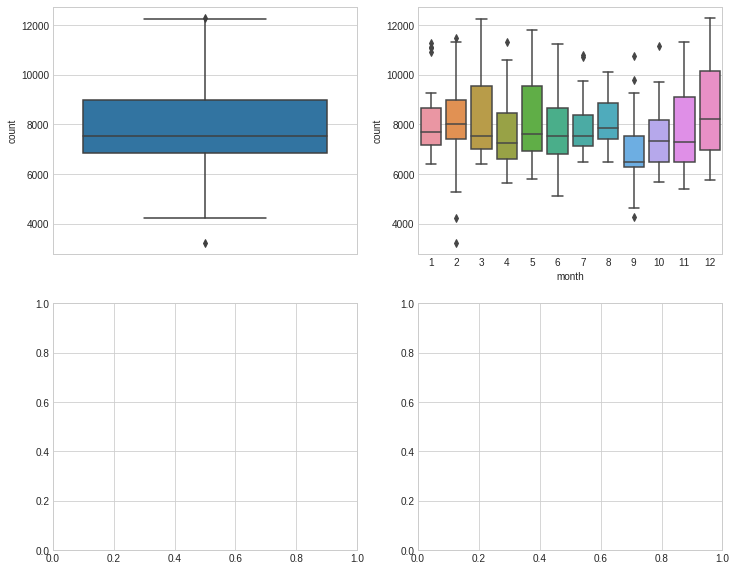

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=df_corr, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=df_corr, y='count', x='month', orient='v', ax=axes[0][1])
sns.boxplot(data=df_corr, y='count', x='day_of_week', orient='v', ax=axes[1][0])
sns.boxplot(data=df_corr, y='count', x='subway_line', orient='v', ax=axes[1][1])

;

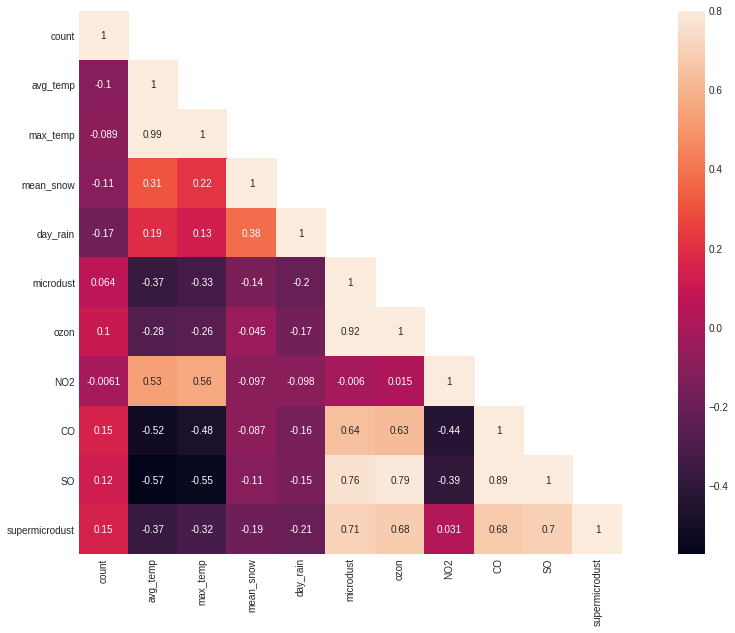

In [93]:
corr_mat = df_corr.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(
    corr_mat,
    mask=mask,
    vmax=.8,
    square=True,
    annot=True
);

In [ ]:
sns.displot(df_corr, x='count')
;

In [ ]:
max(df_corr['count'])


In [ ]:
df_corr[df_corr['count']==25062]

In [ ]:
aggr_month = pd.DataFrame(df_corr.groupby('month')['count'].mean()).reset_index()
sns.barplot(data=aggr_month, x='month', y='count')

In [ ]:
aggr_hour = pd.DataFrame(
    df_corr.groupby(['hour', 'day_of_week'], sort=True
    )['count'].mean()
).reset_index()

sns.pointplot(data=aggr_hour, x='hour', y='count', hue='day_of_week', join=True)

In [ ]:
df_corr['season'] = df_corr['month'].map({
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter'
})

In [ ]:
aggr_season = pd.DataFrame(
    df_corr.groupby('season', sort=True)['count'].mean()
).reset_index()

sns.pointplot(data=aggr_season, x='season', y='count');


In [ ]:
aggr_season

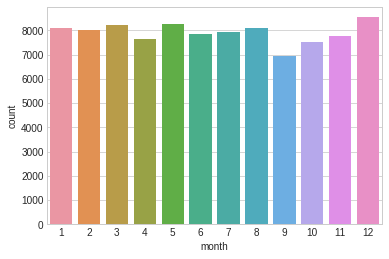

In [95]:
aggr_month = pd.DataFrame(df_corr.groupby('month')['count'].mean()).reset_index()
sns.barplot(
    data=aggr_month, x='month', y='count'
)

# Not Quite Important Stuff

In [ ]:
from io import StringIO

import requests
import pandas as pd


In [ ]:
import requests
import pandas as pd
from io import StringIO

url = 'http://odc.data.seoul.go.kr/bigfile/iot/inf/nio_download.do?&useCache=false'
data = {
    'infId': 'OA-2221',
    'seqNo': None,
    'seq': '13',
    'infSeq': '3'
}

airpollut_csv = requests.post(url, data).text
csv_data = StringIO(airpollut_csv)

airpollution = pd.read_csv(csv_data)
airpollution

In [ ]:
url = "http://odc.data.seoul.go.kr/bigfile/iot/inf/nio_download.do?&useCache=false"
data = {
    'infId': 'OA-2218',
    'seqNo': None,
    'seq': '12',
    'infSeq': '3'
} 

airpol_daily_xlsx = requests.post(url, data).content
airpol_daily_xlsx

In [ ]:
airpollution_daily = pd.read_excel(StringIO(airpol_daily_xlsx.decode('euc-kr')))
airpollution_daily


In [ ]:
excel_data = StringIO(airpol_daily_xlsx)
airpollution_daily = pd.read_excel(excel_data, )
airpollution_daily